# Reding the Data

In [59]:
import numpy as np
import pandas as pd
#reading Data
df_test=pd.read_csv("Test.csv")
df_train=pd.read_csv("Train.csv")
# y=Wx+b
x_test=np.array(df_test['x'])
y_test=np.array(df_test['y'])
x_train=np.array(df_train['x'])
y_train=np.array(df_train['y'])

x_test=x_test.reshape((x_test.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))
x_train=x_train.reshape((x_train.shape[0],1))
y_train=y_train.reshape((y_train.shape[0],1))

# Standardize data

In [64]:
#Sd
def standardize_data(data, mean, std):
    return (data - mean)/std

x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
x_std=np.std(x_train)
y_std=np.std(y_train)

x_test=standardize_data(x_test,x_mean,x_std)
y_test=standardize_data(y_test,y_mean,y_std)
x_train=standardize_data(x_train,x_mean,x_std)
y_train=standardize_data(y_train,y_mean,y_std)


# Finding W and loss 

In [65]:
row = x_train.shape[1]
colms = y_train.shape[1] 

W = 0.03 * np.random.randn(row, colms)
b = np.random.randn(1, 1)

for i in range(len(x_train)):

    y_pred = np.dot(x_train, W) + b
    
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    
    if i%50 == 0:
        print (f"Epoch: {i}, loss: {loss:.3f}")
    
    N=len(x_train)
    LEARNING_RATE = 1e-1

        
    dW = -(2/N) * np.sum((y_train - y_pred) * x_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db


Epoch: 0, loss: 2.986
Epoch: 50, loss: 0.009
Epoch: 100, loss: 0.009
Epoch: 150, loss: 0.009
Epoch: 200, loss: 0.009
Epoch: 250, loss: 0.009
Epoch: 300, loss: 0.009
Epoch: 350, loss: 0.009
Epoch: 400, loss: 0.009
Epoch: 450, loss: 0.009
Epoch: 500, loss: 0.009
Epoch: 550, loss: 0.009
Epoch: 600, loss: 0.009
Epoch: 650, loss: 0.009


In [66]:
y_pre_test=np.dot(x_test, W) + b
y_pre_train=np.dot(x_train,W) + b
# y_pre,y_test,x_test


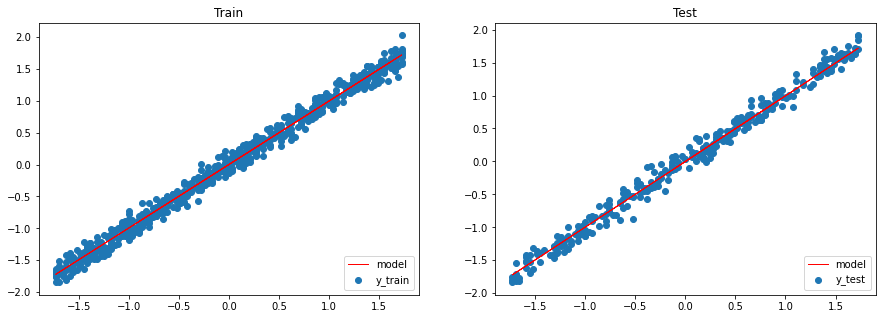

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(x_train, y_train, label='y_train')
plt.plot(x_train, y_pre_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(x_test, y_test, label='y_test')
plt.plot(x_test, y_pre_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

#  Finding Formula

In [75]:
W_unscaled = W * (y_std/x_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*x_mean)
print (f"[model] y_hat = {W_unscaled[0][0]}X + {b_unscaled[0][0]}")

[model] y_hat = 1.0006563818563037X + -0.10726546430096562
